<a href="https://colab.research.google.com/github/Divam-bot/Flow-Mobility/blob/main/Basic_Fair_Pred_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline

In [34]:
dataset = pd.read_csv("/fare_data.csv")
dataset.head()

,day,fair
0,30-03-2018,94.0
1,15-05-2020,164.0
2,15-02-2018,127.0
3,02-03-2019,290.0
4,06-03-2020,436.0


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     9999 non-null   object 
 1   fair    9999 non-null   float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [36]:
dataset['day'] = pd.to_datetime(dataset['day'])

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     9999 non-null   datetime64[ns]
 1   fair    9999 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 156.4 KB


In [38]:
dataset=dataset.dropna()

In [39]:
temp = []
for i in dataset['day']:
  
  temp.append(i.toordinal())
  


In [40]:

dataset['year'] = dataset['day'].dt.year
dataset['month'] = dataset['day'].dt.month
dataset['day'] =dataset['day'].dt.day
dataset['date_ord'] = temp

dataset.head()

,day,fair,year,month,date_ord
0,30,94.0,2018,3,736783
1,15,164.0,2020,5,737560
2,15,127.0,2018,2,736740
3,3,290.0,2019,2,737093
4,3,436.0,2020,6,737579


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   day       9999 non-null   int64  
 1   fair      9999 non-null   float64
 2   year      9999 non-null   int64  
 3   month     9999 non-null   int64  
 4   date_ord  9999 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 468.7 KB


In [52]:
x=dataset.iloc[:500,[4]]
x.head()#x=10

,date_ord
0,736783
1,737560
2,736740
3,737093
4,737579


In [53]:
y=dataset.iloc[:500,1]
y.head()


0     94.0
1    164.0
2    127.0
3    290.0
4    436.0
Name: fair, dtype: float64

Text(0, 0.5, 'Fare earnings(y)')

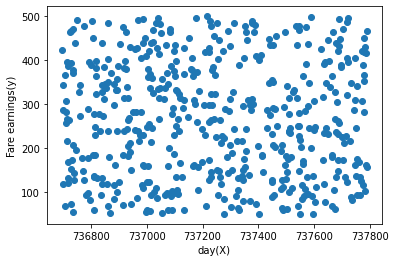

In [54]:
plt.scatter(x,y)
plt.xlabel("day(X)")
plt.ylabel("Fare earnings(y)")
#plt.

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.2, random_state = 0)

In [56]:
x_train[:]

array([[736710],
       [737684],
       [737114],
       [736741],
       [736789],
       [737230],
       [737089],
       [737715],
       [737526],
       [736725],
       [736971],
       [737277],
       [737480],
       [737452],
       [737583],
       [737267],
       [737351],
       [736713],
       [736997],
       [736737],
       [737763],
       [737561],
       [736940],
       [737781],
       [737105],
       [737561],
       [736919],
       [737503],
       [736727],
       [736721],
       [736860],
       [737018],
       [737518],
       [737635],
       [736984],
       [737413],
       [737486],
       [736789],
       [736842],
       [737151],
       [736997],
       [737639],
       [736856],
       [737578],
       [737677],
       [737579],
       [737009],
       [737342],
       [737594],
       [737182],
       [737265],
       [737441],
       [737350],
       [737662],
       [737232],
       [737547],
       [737550],
       [737376],
       [736796

In [57]:
y_test[:]

array([281., 191., 434., 278., 486., 384., 327.,  52., 390.,  70., 439.,
       355., 255., 309., 397., 388., 343., 356., 373., 239., 386., 245.,
       244., 225., 201., 202., 439., 119.,  93., 292., 397., 386., 175.,
       499., 494., 467., 324.,  83., 136., 399.,  72., 105.,  58., 149.,
       451., 164.,  98., 235., 281., 271., 169., 227., 263., 241., 428.,
       266., 151., 454., 391.,  58., 343., 418., 418., 420., 206., 315.,
       365., 158.,  60., 237., 337.,  90., 421., 147.,  92., 184., 230.,
       206., 393., 446., 296., 484., 427., 132., 406., 228., 237., 346.,
       127., 116., 370., 367., 131., 476., 428., 244., 162., 112., 250.,
       327.])

In [63]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [64]:
#print(regressor.predict(x_test[0:5]))
y_pred = regressor.predict(x_test)


In [65]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred) , "%")

25150.346029942106 %
